In [1]:
import numpy as np
import os
import sys


In [2]:
sys.path.append('/home/caffe-user/caffe/python/')


In [3]:
import caffe


In [4]:
caffe.set_mode_gpu()


In [5]:
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
from scipy import signal

In [7]:
net = caffe.Net('/home/caffe-user/caffe/models/bvlc_reference_caffenet/deploy.prototxt', '/home/caffe-user/caffe/models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel', caffe.TEST)


In [8]:
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})


In [9]:
# This is from our current code which uses ILSVRC_2012 image set for training
# The PlacesNet image set is different
trans_model = np.load('/home/caffe-user/caffe/python/caffe/imagenet/ilsvrc_2012_mean.npy')


In [10]:
# the mean of any dataset composed of natural images should be close to [104, 117, 123].
# My guess for greyscale is 115 ... 
trans_model.mean(1).mean(1)



array([ 104.00698793,  116.66876762,  122.67891434])

In [11]:
transformer.set_transpose('data', (2, 0, 1))
# Values from BlobProto notebook from places205CNN_mean.binaryproto
transformer.set_mean('data', trans_model.mean(1).mean(1))
transformer.set_raw_scale('data', 255)
transformer.set_channel_swap('data', (2, 1, 0))


In [53]:
synset_words = []
def loadSynsetInfo():
    with open('/downloads/kenglish/models/caffe_ilsvrc12/synset_words.txt', 'r') as f:
        for line in f:
            synset = line.rstrip()
            synset_words.append(synset)
loadSynsetInfo()

In [59]:
def myTestFiles():
    file_list = []
    with open('/downloads/kenglish/data/protest_concert/files.lst', 'r') as f:
        for line in f:
            fpath = line.rstrip()
            file_list.append(fpath)
    file_list.append('/downloads/kenglish/data/ImageNet/3350271073_537eccee04.jpg')
    file_list.append('/downloads/kenglish/data/ImageNet/3894159491_ef95ab03dc.jpg')    
    file_list.append('/downloads/kenglish/data/ImageNet/ox_full_481992274_5ca856a768.jpg')    
    return file_list

In [60]:
files = myTestFiles()
net.blobs['data'].reshape(len(files), 3, 227, 227)
i = 0
for fpath in files:
    net.blobs['data'].data[i] = transformer.preprocess('data', caffe.io.load_image(fpath))
    i += 1


In [61]:
net.forward()

{'prob': array([[  2.96074109e-06,   1.05774234e-05,   1.10066867e-05, ...,
           1.86541479e-06,   9.31652976e-05,   1.10132733e-05],
        [  2.31958765e-07,   5.96108111e-06,   8.71833799e-06, ...,
           2.25066628e-06,   4.03781160e-05,   3.67437224e-06],
        [  1.48275910e-06,   1.07829874e-04,   4.29514557e-06, ...,
           1.02066115e-05,   3.94420727e-04,   5.48260141e-05],
        ..., 
        [  1.82360629e-04,   6.87108842e-11,   7.12074456e-04, ...,
           5.02826036e-12,   1.13790977e-10,   5.08804977e-11],
        [  1.66479310e-08,   4.66504311e-08,   2.97428948e-09, ...,
           2.57912774e-07,   1.23441071e-08,   2.61606559e-09],
        [  5.53769308e-10,   2.04070723e-12,   7.56665619e-10, ...,
           5.57545232e-10,   8.92284746e-10,   1.43255074e-10]], dtype=float32)}

In [62]:
net.blobs.keys()

['data',
 'conv1',
 'pool1',
 'norm1',
 'conv2',
 'pool2',
 'norm2',
 'conv3',
 'conv4',
 'conv5',
 'pool5',
 'fc6',
 'fc7',
 'fc8',
 'prob']

In [63]:
[sum(net.blobs['pool5'].data[0].flatten()), sum(net.blobs['pool5'].data[1].flatten()), sum(net.blobs['pool5'].data[2].flatten())]

[48767.878035753965, 42850.19093900919, 40694.463417977095]

In [64]:
sorted([ (max(net.blobs['conv3'].data[i].flatten()), i) for i in range(len(files))  ])[0:10]

[(215.05272, 144),
 (219.92296, 102),
 (219.92296, 143),
 (223.16672, 117),
 (223.73277, 121),
 (223.73277, 138),
 (224.77666, 118),
 (224.87195, 141),
 (225.88277, 154),
 (231.96431, 126)]

In [65]:
sorted([ (sum(net.blobs['conv3'].data[i][j].flatten()), i) for i in range(len(files)) for j in range(net.blobs['conv3'].data[0].shape[0]) ])[0:10]

[(0.0, 0),
 (0.0, 1),
 (0.0, 1),
 (0.0, 2),
 (0.0, 2),
 (0.0, 2),
 (0.0, 2),
 (0.0, 2),
 (0.0, 2),
 (0.0, 2)]

In [66]:
sorted([ (sum(net.blobs['conv3'].data[i][j].flatten()), i) for i in range(len(files)) for j in range(net.blobs['conv3'].data[0].shape[0]) ]
       , reverse=True)[0:10]

[(16553.089981079102, 48),
 (16447.266241312027, 47),
 (15167.886814117432, 3),
 (14159.485389947891, 41),
 (13982.707778930664, 135),
 (13661.329431429505, 40),
 (13439.640265226364, 112),
 (13152.683236122131, 134),
 (12738.715201795101, 141),
 (12725.078114271164, 156)]

In [67]:
net.blobs['conv3'].data[0].shape[0] * len(files) / 4

19200

In [68]:
sorted([ (sum(net.blobs['conv3'].data[i][j].flatten()), i) for i in range(len(files)) for j in range(net.blobs['conv3'].data[0].shape[0]) ]
       , reverse=True)[19104:19104+10]

[(2479.7305336296558, 19),
 (2479.7175364494324, 62),
 (2479.6259709596634, 162),
 (2479.5863736867905, 67),
 (2479.5779440999031, 42),
 (2479.567581653595, 67),
 (2479.5494092702866, 62),
 (2479.5422993078828, 176),
 (2479.3878308534622, 44),
 (2479.3624601960182, 43)]

In [69]:
def filtersAboveThreshold(blobs, layer, idx, threshold):
    n = 0
    for j in range(net.blobs[layer].data[0].shape[0]):
        if sum(net.blobs[layer].data[idx][j].flatten()) > threshold:
               n = n + 1
    return n
def blobsByFiltersAboveThreshold(layer, threshold):
    A = [ (filtersAboveThreshold(net.blobs, layer, i, threshold), i) for i in range(len(files))]
    A.sort(reverse=True)
    return A


In [88]:
blobsByFiltersAboveThreshold('conv3', 2479.0)

[(128, 87),
 (128, 64),
 (128, 59),
 (127, 35),
 (124, 68),
 (122, 80),
 (122, 66),
 (122, 63),
 (122, 33),
 (122, 31),
 (121, 45),
 (121, 10),
 (120, 28),
 (120, 15),
 (120, 1),
 (119, 78),
 (119, 2),
 (118, 83),
 (117, 198),
 (117, 170),
 (117, 97),
 (117, 75),
 (117, 46),
 (117, 40),
 (115, 62),
 (115, 23),
 (115, 11),
 (115, 9),
 (115, 8),
 (115, 6),
 (114, 92),
 (114, 72),
 (114, 3),
 (113, 178),
 (113, 44),
 (112, 192),
 (112, 156),
 (112, 88),
 (112, 71),
 (112, 53),
 (112, 19),
 (112, 12),
 (111, 180),
 (111, 150),
 (111, 26),
 (111, 25),
 (110, 79),
 (110, 42),
 (110, 24),
 (110, 18),
 (110, 13),
 (109, 196),
 (109, 188),
 (109, 90),
 (109, 73),
 (109, 60),
 (109, 50),
 (108, 86),
 (108, 43),
 (107, 85),
 (107, 37),
 (107, 34),
 (107, 7),
 (107, 5),
 (107, 4),
 (106, 96),
 (106, 94),
 (106, 77),
 (106, 14),
 (105, 98),
 (105, 89),
 (105, 67),
 (105, 32),
 (105, 27),
 (105, 0),
 (104, 91),
 (104, 74),
 (104, 48),
 (103, 57),
 (103, 16),
 (102, 176),
 (102, 47),
 (102, 39),
 (10

In [71]:

sorted([ (net.blobs['prob'].data[152][i], [i]) for i in range(1000) ], reverse=True)

[(0.37368253, [345]),
 (0.13565414, [690]),
 (0.09945675, [347]),
 (0.069531322, [341]),
 (0.062466126, [349]),
 (0.041028805, [354]),
 (0.034026824, [342]),
 (0.020854285, [355]),
 (0.017975956, [276]),
 (0.017369125, [350]),
 (0.01545019, [346]),
 (0.013563296, [275]),
 (0.0096741272, [343]),
 (0.0037811857, [603]),
 (0.0034283993, [579]),
 (0.0030991249, [857]),
 (0.0027902292, [974]),
 (0.002647453, [348]),
 (0.0024843686, [978]),
 (0.0021529472, [562]),
 (0.0021045145, [832]),
 (0.0019328862, [274]),
 (0.0017688992, [270]),
 (0.0016433982, [703]),
 (0.001639382, [385]),
 (0.0015338634, [222]),
 (0.0014172407, [727]),
 (0.0012169529, [668]),
 (0.0012148189, [372]),
 (0.0012014057, [406]),
 (0.0011332232, [386]),
 (0.0010758934, [469]),
 (0.0010447024, [540]),
 (0.00101036, [847]),
 (0.00093384087, [975]),
 (0.00088913157, [537]),
 (0.00084135443, [470]),
 (0.0008160182, [663]),
 (0.00081328151, [634]),
 (0.00080058817, [715]),
 (0.00078586006, [862]),
 (0.00078202219, [970]),
 (0.0

In [73]:
( (synset_words[345], synset_words[690], synset_words[347], synset_words[341], synset_words[349]), files[152])


(('n02403003 ox',
  'n03868242 oxcart',
  'n02410509 bison',
  'n02395406 hog, pig, grunter, squealer, Sus scrofa',
  'n02415577 bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis'),
 '/downloads/kenglish/data/protest_concert/night_protest/images (2).jpg')

So this image that most poorly activated the conv3 layer:
![protestors](data/protest_concert/night_protest/images%20%282%29.jpg)
Is classified as an "ox"

In [74]:
files[len(files)-1]

'/downloads/kenglish/data/ImageNet/ox_full_481992274_5ca856a768.jpg'

The last image submitted in this notebook is a picture of an Ox from the original training set:
![an ox](data/ImageNet/ox_full_481992274_5ca856a768.jpg)
This image had 196 of the 384 conv3 filters above the quartile-threshold compared to the 52 for the misclassified image and is strongly classified as an ox.

In [89]:
sorted([ (net.blobs['prob'].data[len(files)-1][i], [i]) for i in range(1000) ], reverse=True)[0:10]

[(0.9098528, [345]),
 (0.057006653, [347]),
 (0.024963997, [294]),
 (0.0036688349, [256]),
 (0.0008034276, [348]),
 (0.00059190881, [354]),
 (0.00055889232, [386]),
 (0.00046369233, [346]),
 (0.00028248184, [226]),
 (0.0001670449, [355])]

In [76]:
len(files)-1

199

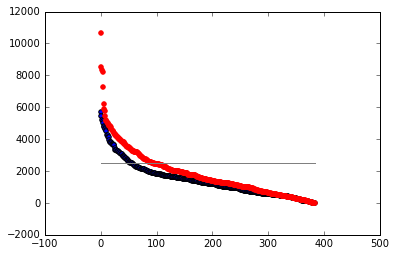

In [91]:
# Comparison of conv3 feature 'energies' between misclassified image (blue) and correct image (red)
# Activation threshold line in gray
import matplotlib
plt.plot([0, 383], [2479.0, 2479.0], color='gray')
scatter_x = range(384)
scatter_y = sorted([sum(net.blobs['conv3'].data[152][j].flatten()) for j in scatter_x], reverse=True)
plt.scatter(scatter_x, scatter_y)
scatter_y2 = sorted([sum(net.blobs['conv3'].data[199][j].flatten()) for j in scatter_x], reverse=True)
plt.scatter(scatter_x, scatter_y2, color='red')
plt.show()

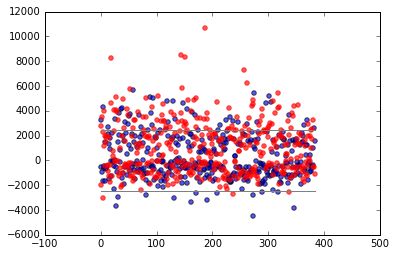

In [99]:
# Without the values sorted, negate lesser value
# Note that there are 52 blue dots above the top gray line and 196 red dots above the top gray line
plt.plot([0, 383], [2479.0, 2479.0], color='gray')
plt.plot([0, 383], [-2479.0, -2479.0], color='gray')
scatter_x = range(384)
scatter_y = [sum(net.blobs['conv3'].data[152][j].flatten()) for j in scatter_x]
scatter_y2 = [sum(net.blobs['conv3'].data[199][j].flatten()) for j in scatter_x]
for i in scatter_x:
    if scatter_y[i] < scatter_y2[i]:
        scatter_y[i] = 0 - scatter_y[i]
    else:
        scatter_y2[i] = 0 - scatter_y2[i]
plt.scatter(scatter_x, scatter_y, alpha=0.66)
plt.scatter(scatter_x, scatter_y2, color='red', alpha=0.66)
plt.show()